# EngiTuto

This is a basic tutorial showing how to use EngiBench and interact with problems.

Author: Florian Felten <ffelten@mavt.ethz.ch>

In [19]:
!pip install -e ".[all]"

Obtaining file:///Users/ffelte/Documents/EngiBench
  Installing build dependencies ... one
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Cloning https://github.com/mdolab/pyoptsparse to /private/var/folders/fw/69hmbxm946l1xycg8w29nw0800l9gd/T/pip-install-kdqlym0d/pyoptsparse_fe81d0a304d546d0a8dd98c8ffa330f8
  Running command git clone --filter=blob:none --quiet https://github.com/mdolab/pyoptsparse /private/var/folders/fw/69hmbxm946l1xycg8w29nw0800l9gd/T/pip-install-kdqlym0d/pyoptsparse_fe81d0a304d546d0a8dd98c8ffa330f8
  Resolved https://github.com/mdolab/pyoptsparse to commit f66e9fbd6712dbb941794698cf87fc053c8a7986
  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Building editable for engibench (pyproject.toml) ... done
  Created wheel for engibench: filename=engibench-0.0.1-0.

## Step 1: Instantiate a Problem

Let us see the 2D Airfoil problem

In [20]:
from engibench.problems.airfoil2d import airfoil2d_v0

In [28]:
problem = airfoil2d_v0.build()
problem.reset(99)

u22-gcc-ompi-stable: Pulling from mdolab/public
Digest: sha256:8a2349b7a2587b3317ad09b6a8096f615cc4c4283f43879e897e3ad53e830cd9
Status: Image is up to date for mdolab/public:u22-gcc-ompi-stable
docker.io/mdolab/public:u22-gcc-ompi-stable
Creating study directory: /Users/ffelte/Documents/EngiBench/engibench_studies/problems/airfoil2d/study_99
Copying files from /Users/ffelte/Documents/EngiBench/engibench/problems/airfoil2d/templates to /Users/ffelte/Documents/EngiBench/engibench_studies/problems/airfoil2d/study_99
Creating study directory: /Users/ffelte/Documents/EngiBench/engibench_studies/problems/airfoil2d
Copying files from /Users/ffelte/Documents/EngiBench/engibench/problems/airfoil2d/scripts to /Users/ffelte/Documents/EngiBench/engibench_studies/problems/airfoil2d



What's Next?
  View a summary of image vulnerabilities and recommendations → docker scout quickview mdolab/public:u22-gcc-ompi-stable


## Step 2: Inspect the Problem

### 2.1: Representation, Objectives, Boundary Conditions
The output just below means our airfoil is parameterized by 192 (`x, y`) positions in `[0, 1]`.

In [22]:
problem.design_space

Box(0.0, 1.0, (2, 192), float32)

In [23]:
problem.possible_objectives

frozenset({('cd', 'minimize'), ('cl', 'maximize')})

In [24]:
problem.boundary_conditions

frozenset({('marchDist', 100.0), ('s0', 3e-06)})

### 2.2 Data
We can directly access [the dataset linked to the problem](https://huggingface.co/datasets/IDEALLab/airfoil_2d_v0) doing the following:

In [25]:
problem.dataset

DatasetDict({
    train: Dataset({
        features: ['initial', 'optimized', 'mach', 'reynolds', 'cl_target', 'area_target', 'alpha', 'area_initial', 'cd_val', 'cl_val', 'cl_con', 'area_con'],
        num_rows: 748
    })
    val: Dataset({
        features: ['initial', 'optimized', 'mach', 'reynolds', 'cl_target', 'area_target', 'alpha', 'area_initial', 'cd_val', 'cl_val', 'cl_con', 'area_con'],
        num_rows: 140
    })
    test: Dataset({
        features: ['initial', 'optimized', 'mach', 'reynolds', 'cl_target', 'area_target', 'alpha', 'area_initial', 'cd_val', 'cl_val', 'cl_con', 'area_con'],
        num_rows: 47
    })
})

## Step 3: Creating a Design and Launching the Simulator
While you usually would generate a design based on a generative or surrogate mode, we here show how to play with a rather random one.

In [ ]:
my_design = problem.random_design()
my_design

You can also render designs to see what they look like.

(<Figure size 640x480 with 1 Axes>, <Axes: >)

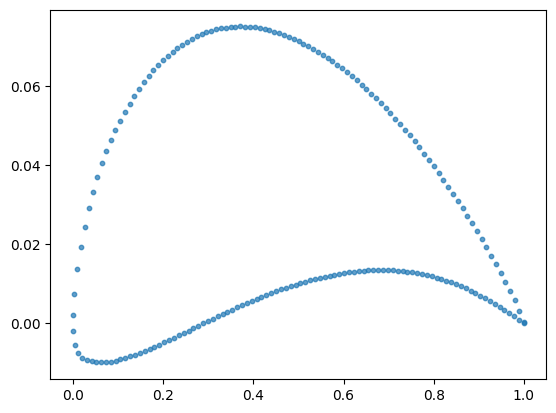

In [27]:
problem.render(my_design)

Finally, you can:
- Simulate a design to get its objective values with `objs = problem.simulate(my_design)`
- Optimize a given design with `optimal_design, objs = problem.optimize(my_design)`

Note that this is not trivially doable here since the simulation requires launching a container 😅.